In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm

import model_opt
import data_generate
import algo_GD

_t_max =10000
_cmap = plt.cm.jet
w_init = [10,10]

In [2]:
f = model_opt.Bohachevsky(err = 2)
algo = algo_GD.GD(w=w_init,t_max=_t_max)

In [3]:
# updateを行うたびに異なるノイズが加えられる
for i in tqdm(algo):
    algo.update(model=f,a=0.01)


In [4]:
w_store = np.array(algo.wstore)

<a list of 29 text.Text objects>

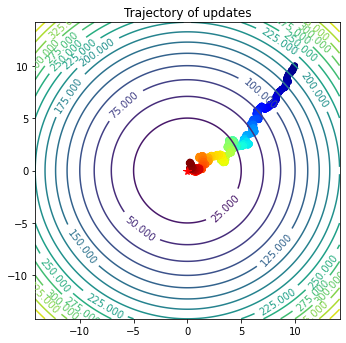

In [5]:
w_star = f.w_star
# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2


tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)

# ax2 = myfig.add_subplot(2,2,2)

# plt.title("loss transition")
# plt.xlabel('number of update steps')
# plt.ylabel('loss')
# ax2.plot(list(range(_t_max)),loss_transition)

In [7]:
algo.w_mean[-1]

array([4.10390902, 2.7225445 ])